# Comparing the electrophysiological features of cells

We've talked about various membrane properties like resistance and capacitance, but how do these actually play out in real cells, which are morphologically diverse?

![](https://canvas.brown.edu/courses/851434/files/38768331/preview?verifier=D6ZNKahSL6e9e6xh4GMAfbbSJK6ynSYYQwmcKBo8)

This notebook will load and plot a dataset with various features for mouse or human cells that were curated from the [Allen Cell Types](https://celltypes.brain-map.org/) database. By doing so, we'll be able to test our hypothesis about the relationship between different electrophysiological features of cells, such as their surface area, rheobase, time constant, and input resistance.
<hr>

### Table of contents
- [Setup](#setup)
- [Load the dataset](#load)
- [Compare all features](#overview)
- [Focus on features to compare](#compare)

<a id="setup"></a>
## Setup

First, we need to import a variety of plotting and scientific computing packages. We'll also make sure that plots happen inline and in high resolution.

><b>Task</b>: Run the cell below.

In [ ]:
# Import plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns

# Specify that all plots will happen inline & in high resolution
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

# Import pandas and numpy for working with databases
import pandas as pd
import numpy as np

print('Packages imported.')

<a id="load"></a>
## Load the dataset
><b>Task</b>: Choose to work with the mice or human dataset by uncommenting (removing the `#`) from one of the `dataset` lines below. Then, run the cell.

In [ ]:
# Only one of the dataset lines below should be uncommented!
dataset = pd.read_csv('data/mouse_cell_metrics.csv')
#dataset = pd.read_csv('data/human_cell_metrics.csv')

print('Number of cells: ' + str(len(dataset)))

# Show the first five rows of the dataset
dataset.head()

<a id="overview"></a>
## Compare all of the features in this dataset

As you can see in the first five rows of the dataset above, this dataset contains observations about the following features:
- (estimated) cell surface area (in µm^2)
- dendrite type (spiny, aspiny, or sparsely spiny)
- rheobase (in nA)
- input resistance (in MOhms)
- tau (in ms)

Each row of the dataset contains all of these features for individual cells.

Below, we'll use a really handy tool from Seaborn called [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) which will plot a grid of all of these cell features against eachother. It will also show us a histogram of values for each of the features -- an important first step of working with any data.

><b>Task</b>: <font color='red'> Observe the cell below, but do not run it (it will not work in Fall 2021)!</font>

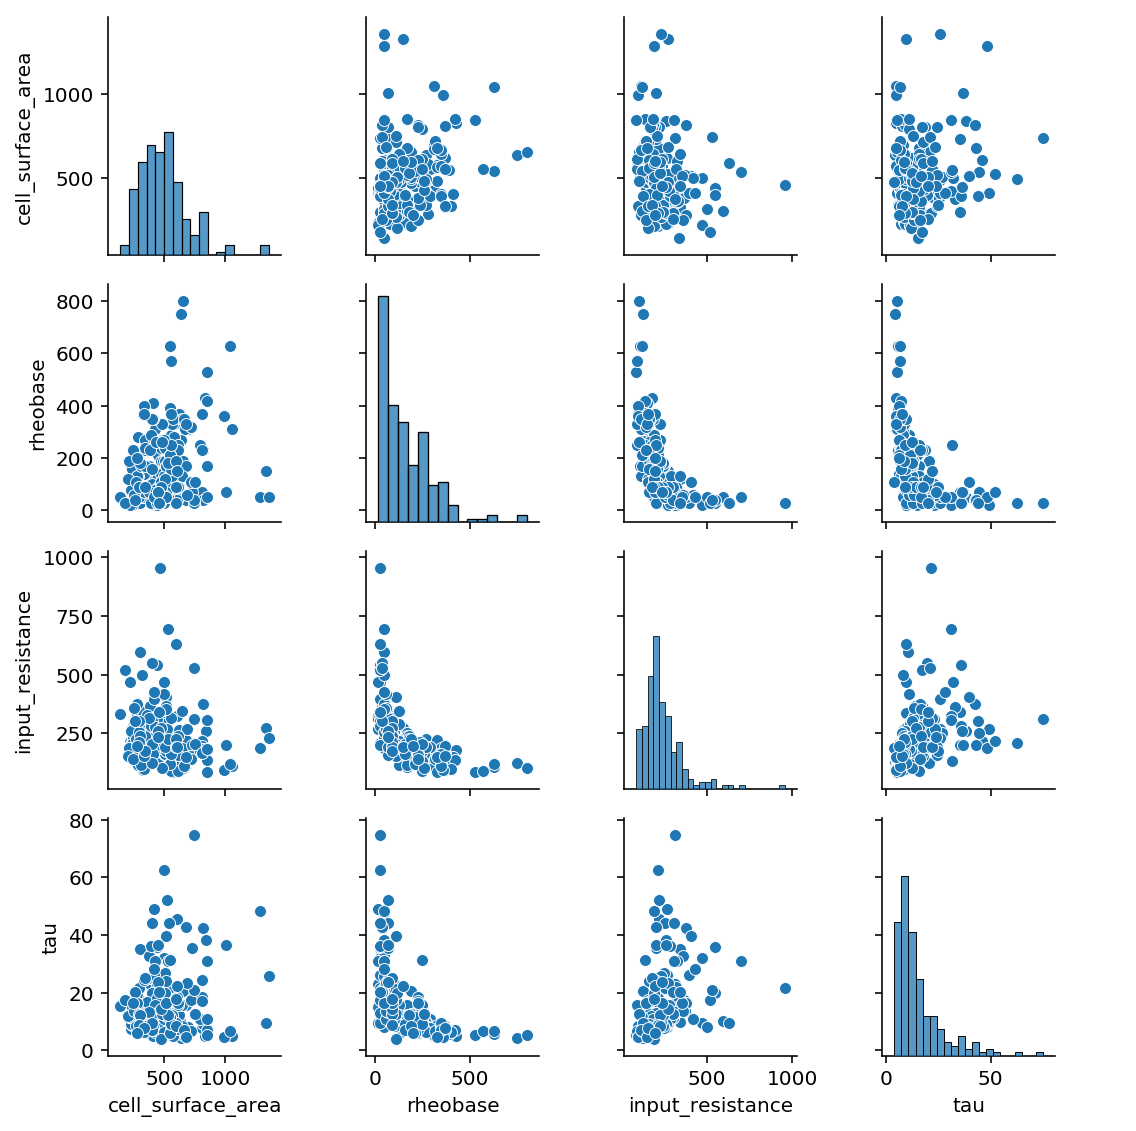

In [4]:
pairplot = sns.pairplot(dataset,height=2)
#pairplot.set(xscale='log',yscale='log') # this changes both x and y scale to log
plt.show()

### Site note: What does log-scaling mean?

The four-by-four figure that is produced above shows many potentially interesting relationships between these cell features! The relationship between features is even more clear when we plot the axes on a log-scale. Why is this?

To understand why this is, let's develop our intuition for what log-scaling even means. First, we'll create a list of 10 numbers, from 1 to 10, evenly spaced by one.

In [ ]:
x = np.arange(1,11,1) # Use np.arange() to create a simple list
print(x)

><b>Task</b>: Use this list <code>x</code> to create <code>y</code> which is composed of 2^ each value in <code>x</code>. You can write this as `2**x`. In other words, we're making a list of exponentially increasing values. In other, other words, the values increase by an *order of magnitude*. Print your list of y values so that you can see what you've created.

In [ ]:
y = ...

><b>Task</b>: Plot these vectors we just created using <code>plt.plot(x,y,marker='.')</code> in the cell below. Don't forget to add <code>plt.show()</code> to cleanly show just the plot.


In [ ]:
# Add your plot here!


So, this is what our artificial data looks like when the data is plotted on a linear scale (1-10). What happens when we plot the data on a log scale, where each equally spaced tick mark actually increases by a factor of 10?

><b>Task</b>: Since our y-scale is the one that rises exponentially, let's add <code>plt.yscale('log')</code> <i>before</i> <code>plt.show()</code> in the code block above so that the y-axis will be plotted on a log-scale. <b>How does this change the relationship between the variables in your plot?</b>

For sets of data that change by orders of magnitude, log-scaled axes can help us more clearly see relationships between variables. For an in depth explanation of log scales, see this [Khan Academy Video](https://www.khanacademy.org/math/algebra-home/alg-exp-and-log/alg-logarithmic-scale/v/logarithmic-scale). For a consideration of *when* you should use log scales, see [this article](https://www.forbes.com/sites/naomirobbins/2012/01/19/when-should-i-use-logarithmic-scales-in-my-charts-and-graphs/#52b49d675e67).

><b>Note</b>: When we use `plt.yscale('log')` we are not changing the data itself; we are only changing the scale it is being plotted on. This is different than doing a log transformation of the data. Run the cell below to see what happens when you do an actual log transformation on the data. Note that the actual values being plotted are different. As a result, we should label our axis in this case "log(x)".

In [ ]:
log_x = np.log(x)
print('New x values:')
print(log_x)
plt.plot(log_x,y)
plt.ylabel('y')
plt.xlabel('log(x)')
plt.show()

<a id="focus"></a>
## Focus on features to compare
Back to the real data and our cell features! 

The pairplot above gives a great overview, but you may want to focus in on one of these interesting comparisons. In fact, chances are you have an <i>a priori</i> hypothesis about the relationship between two of these features, based on what we've talked about in class.

To easily generate a plot of two variables, we can use [matplotlib's scatterplot function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). We're going to refer to each of the columns in the Pandas dataframe using the syntax `dataframe['COLUMN']`.

><b>Task</b>: Create a plot of <b>two</b> different metrics above by substituting FEATURE for the <i>exact</i> name of the column in the data. The spelling needs to be exact in order for it to work -- <code>cell_surface_features</code> is not the same thing as <code>cell surface features</code>. For some of these comparisons, it may be most useful to plot the comparisons on a log scale.

In [ ]:
# We've set up a square figure for you!
fig = plt.figure(figsize=(5,5))

# Replace FEATURE with your feature of interest
plt.scatter(dataset['FEATURE'],dataset['FEATURE'])

plt.show()

><b>Task</b>: Right click on your figure to save it as "cell_features_comparison.png". Make sure your graph has clearly labeled axes with units.

In [ ]:
from IPython.display import HTML
HTML('<img src="https://media.giphy.com/media/l0MYt5jPR6QX5pnqM/giphy.gif">')